In [1]:
from metabolinks import align, read_aligned_spectra, read_spectra_from_xcel
from metabolinks.similarity import mz_similarity
#This and another later warning appears since I messed up my package versions in anaconda. It doesn't affect anything here.

C:\Users\francisco\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


#### Read (reload) aligned from CSV

In [2]:
aligned_all_pos = read_aligned_spectra('aligned_1ppm_min3_1ppm_positive.csv', labels=True, sep=',')
aligned_all_neg = read_aligned_spectra('aligned_1ppm_min3_1ppm_negative.csv', labels=True, sep=',')

## Lists of m/z exclusive of each label

In [3]:
print('------- POSITIVE mode ------------------')
for label, values in aligned_all_pos.exclusive_mz.items():
    print(f'{label:4} {len(values)}')

with open('exclusive_pos.txt','w') as ofile:
    for label, values in aligned_all_pos.exclusive_mz.items():
        line = '\t'.join([label] + [str(v) for v in values])
        print(line, file = ofile)

print('------- NEGATIVE mode ------------------')
for label, values in aligned_all_neg.exclusive_mz.items():
    print(f'{label:4} {len(values)}')

with open('exclusive_neg.txt','w') as ofile:
    for label, values in aligned_all_neg.exclusive_mz.items():
        line = '\t'.join([label] + [str(v) for v in values])
        print(line, file = ofile)

------- POSITIVE mode ------------------
CAN  16
CS   33
LAB  41
PN   412
REG  234
RIP  4
RL   30
ROT  15
RU   140
TRI  101
CFN  39
CHT  8
SB   21
------- NEGATIVE mode ------------------


In [4]:
aligned_all_pos = read_aligned_spectra('aligned_1ppm_min3_2ppm_positive.csv', labels=True, sep=',')
aligned_all_neg = read_aligned_spectra('aligned_1ppm_min3_2ppm_negative.csv', labels=True, sep=',')
#print('------ positive mode aligned --------------')
#print(aligned_all_pos.info())
#print('------ negative mode aligned --------------')
#print(aligned_all_neg.info())

In [5]:
print('------- POSITIVE mode ------------------')
for label, values in aligned_all_pos.exclusive_mz.items():
    print(f'{label:4} {len(values)}')

with open('exclusive_pos_2ppm.txt','w') as ofile:
    for label, values in aligned_all_pos.exclusive_mz.items():
        line = '\t'.join([label] + [str(v) for v in values])
        print(line, file = ofile)

print('------- NEGATIVE mode ------------------')
for label, values in aligned_all_neg.exclusive_mz.items():
    print(f'{label:4} {len(values)}')

with open('exclusive_neg_2ppm.txt','w') as ofile:
    for label, values in aligned_all_neg.exclusive_mz.items():
        line = '\t'.join([label] + [str(v) for v in values])
        print(line, file = ofile)

------- POSITIVE mode ------------------
CAN  13
CS   22
LAB  37
PN   364
REG  209
RIP  2
RL   19
ROT  9
RU   115
TRI  83
CFN  35
CHT  8
SB   15
------- NEGATIVE mode ------------------
CAN  25
CS   139
LAB  15
PN   60
REG  216
RIP  63
RL   11
ROT  170
RU   202
TRI  18
CFN  7
CHT  34
SB   14


## Similarity analysis

#### Read aligned data, using peaks that appear in at least 2 samples

In [6]:
aligned_all_pos = read_aligned_spectra('aligned_1ppm_min2_1ppm_positive.csv', labels=True, sep=',')
aligned_all_neg = read_aligned_spectra('aligned_1ppm_min2_1ppm_negative.csv', labels=True, sep=',')
#print('------ positive mode aligned --------------')
#print(aligned_all_pos.info())
#print('------ negative mode aligned --------------')
#print(aligned_all_neg.info())

#### Compute m/z similarities

In [7]:
sim_pos = mz_similarity(aligned_all_pos)
sim_neg = mz_similarity(aligned_all_neg)

In [8]:
print(sim_pos)


Sample similarity, counts of common peaks
          14   15   16   29   30   31    8    9   10    23  ...    34  \
14       330  277  253  202  200  195  207  214  207   152  ...   175   
15       277  379  302  233  232  224  227  231  223   179  ...   201   
16       253  302  355  222  222  218  212  212  208   164  ...   189   
29       202  233  222  667  514  526  230  233  235   308  ...   351   
30       200  232  222  514  612  471  236  236  235   284  ...   326   
31       195  224  218  526  471  624  232  237  239   294  ...   338   
8        207  227  212  230  236  232  489  399  369   182  ...   205   
9        214  231  212  233  236  237  399  501  381   184  ...   218   
10       207  223  208  235  235  239  369  381  471   181  ...   221   
23       152  179  164  308  284  294  182  184  181  1487  ...   431   
24       151  176  162  308  286  297  187  190  188  1246  ...   443   
25       146  174  159  296  269  286  177  179  180  1095  ...   429   
38      

In [9]:
print(sim_neg)


Sample similarity, counts of common peaks
          14   15   16   29   30   31    8    9   10   23  ...   34  10713-1  \
14       442  286  345  186  183  170  168  179  179   34  ...  151        6   
15       286  319  222  121  118  108  144  157  155   25  ...  146        4   
16       345  222  378  174  171  159  168  181  177   34  ...  148        4   
29       186  121  174  674  637  588  143  151  150   88  ...  202       16   
30       183  118  171  637  677  591  142  150  149   88  ...  214       22   
31       170  108  159  588  591  628  128  135  135   87  ...  184       22   
8        168  144  168  143  142  128  370  331  339  118  ...  131        4   
9        179  157  181  151  150  135  331  402  371  111  ...  138        4   
10       179  155  177  150  149  135  339  371  410  120  ...  138        4   
23        34   25   34   88   88   87  118  111  120  350  ...   23       10   
24        46   33   45   95   95   94  127  121  129  314  ...   30       10 

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd

In [11]:
dfpos = pd.DataFrame(sim_pos.sample_similarity_jaccard,
                     columns=sim_pos.sample_names,
                     index=sim_pos.sample_names)

dfneg = pd.DataFrame(sim_neg.sample_similarity_jaccard,
                     columns=sim_neg.sample_names,
                     index=sim_neg.sample_names)

Sample similarity, positive mode


C:\Users\francisco\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


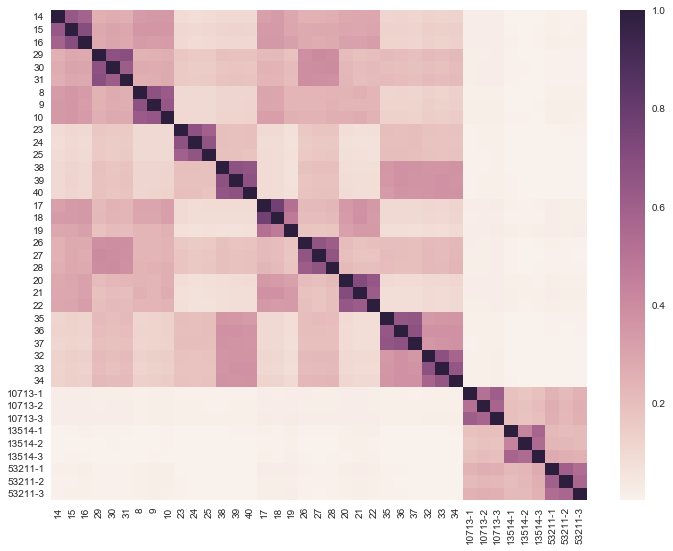

In [12]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, positive mode')
hm = sns.heatmap(dfpos, annot=False, ax=ax)

Sample similarity, negative mode


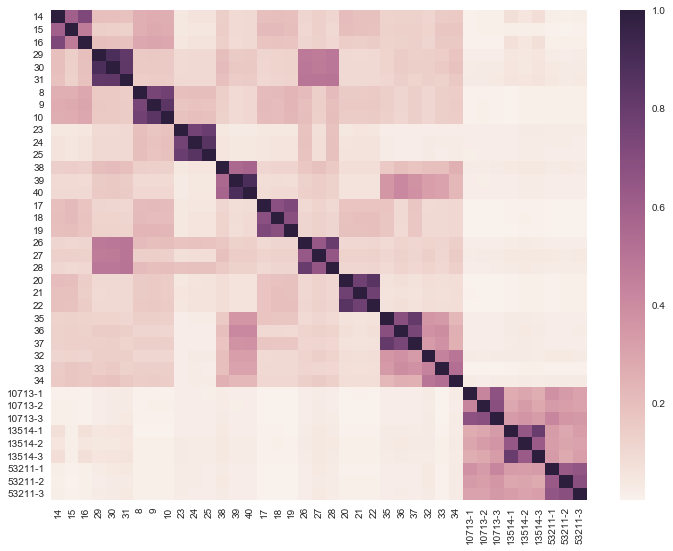

In [13]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, negative mode')
hm = sns.heatmap(dfneg, annot=False, ax=ax)

In [14]:
dfpos = pd.DataFrame(sim_pos.label_similarity_jaccard,
                     columns=sim_pos.unique_labels,
                     index=sim_pos.unique_labels)

dfneg = pd.DataFrame(sim_neg.label_similarity_jaccard,
                     columns=sim_neg.unique_labels,
                     index=sim_neg.unique_labels)

Label similarity, positive mode


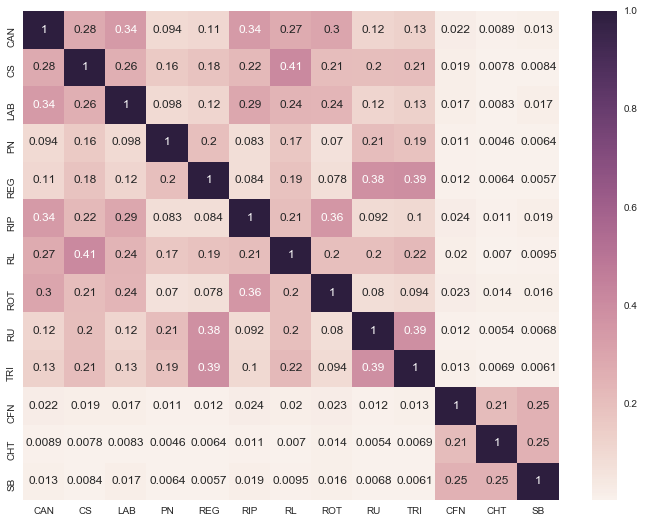

In [15]:
f, ax = plt.subplots(figsize=(12, 9))

print('Label similarity, positive mode')
hm = sns.heatmap(dfpos, annot=True, ax=ax)

Label similarity, negative mode


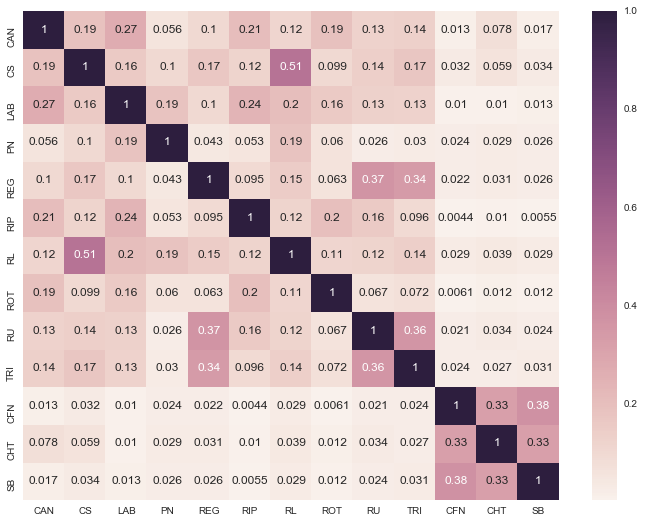

In [16]:
f, ax = plt.subplots(figsize=(12, 9))

print('Label similarity, negative mode')
hm = sns.heatmap(dfneg, annot=True, ax=ax)

#### Doing... Experiments with scipy functions...

In [17]:
import scipy.spatial.distance as dist
import scipy.cluster.hierarchy as hier

In [18]:
def df_to_bool(df):
    df = df.copy()
    df[df.notnull()] = 1
    df[df.isnull()] = 0
    return df
aligned_01 = df_to_bool(aligned_all_neg.data)
# confirm it is 0's and 1's
#aligned_01

In [19]:
jdist = dist.pdist(aligned_01.T, metric='jaccard')
print(dist.squareform(jdist))
print('------------------------------------')
sim = mz_similarity(aligned_all_neg)
jsim = sim.sample_similarity_jaccard
jdist = 1 - jsim
print(jdist)

[[ 0.          0.39789474  0.27368421 ...,  0.98458904  0.98819562
   0.98148148]
 [ 0.39789474  0.          0.53263158 ...,  0.98924731  0.99367089
   0.98951782]
 [ 0.27368421  0.53263158  0.         ...,  0.98852772  0.98867925
   0.98499062]
 ..., 
 [ 0.98458904  0.98924731  0.98852772 ...,  0.          0.37368421
   0.34736842]
 [ 0.98819562  0.99367089  0.98867925 ...,  0.37368421  0.          0.31052632]
 [ 0.98148148  0.98951782  0.98499062 ...,  0.34736842  0.31052632  0.        ]]
------------------------------------
[[ 0.          0.39789474  0.27368421 ...,  0.98458904  0.98819562
   0.98148148]
 [ 0.39789474  0.          0.53263158 ...,  0.98924731  0.99367089
   0.98951782]
 [ 0.27368421  0.53263158  0.         ...,  0.98852772  0.98867925
   0.98499062]
 ..., 
 [ 0.98458904  0.98924731  0.98852772 ...,  0.          0.37368421
   0.34736842]
 [ 0.98819562  0.99367089  0.98867925 ...,  0.37368421  0.          0.31052632]
 [ 0.98148148  0.98951782  0.98499062 ...,  0.347368

## Wrapping up in a function...

In [20]:
def clustermap_peak_list(aligned):
    aligned_01 = aligned.data.copy()
    aligned_01[aligned_01.notnull()] = 1
    aligned_01[aligned_01.isnull()] = 0
    
    ulabels = aligned.unique_labels()
    n = len(ulabels)
    
    p = sns.color_palette() + sns.color_palette("Set1", n_colors=n-6, desat=.5)
    sample_to_labels = pd.Series(aligned.labels, index=aligned.sample_names)
    label_colors = pd.Series(p, index=ulabels)
    sample_colors = sample_to_labels.map(label_colors)
    
    g = sns.clustermap(aligned_01, metric="jaccard", figsize=(15, 20), 
                       row_cluster=False,
                       col_colors=sample_colors,
                       yticklabels=False)
    # fix bug in seaborn, error in clustermap if cbar == False
    ax=g.cax; aax=ax.clear(); aax = ax.axis('off'); 

    # draw legend
    lpatches = [mpatches.Patch(color=c, label=lbl) for (lbl, c) in label_colors.iteritems()]
    leg = plt.legend(handles=lpatches, fontsize=20)
    return g
    

Sample HC, NEGATIVE mode


C:\Users\francisco\Anaconda3\lib\site-packages\seaborn\matrix.py:795: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  colors = colors.ix[data.columns]
C:\Users\francisco\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


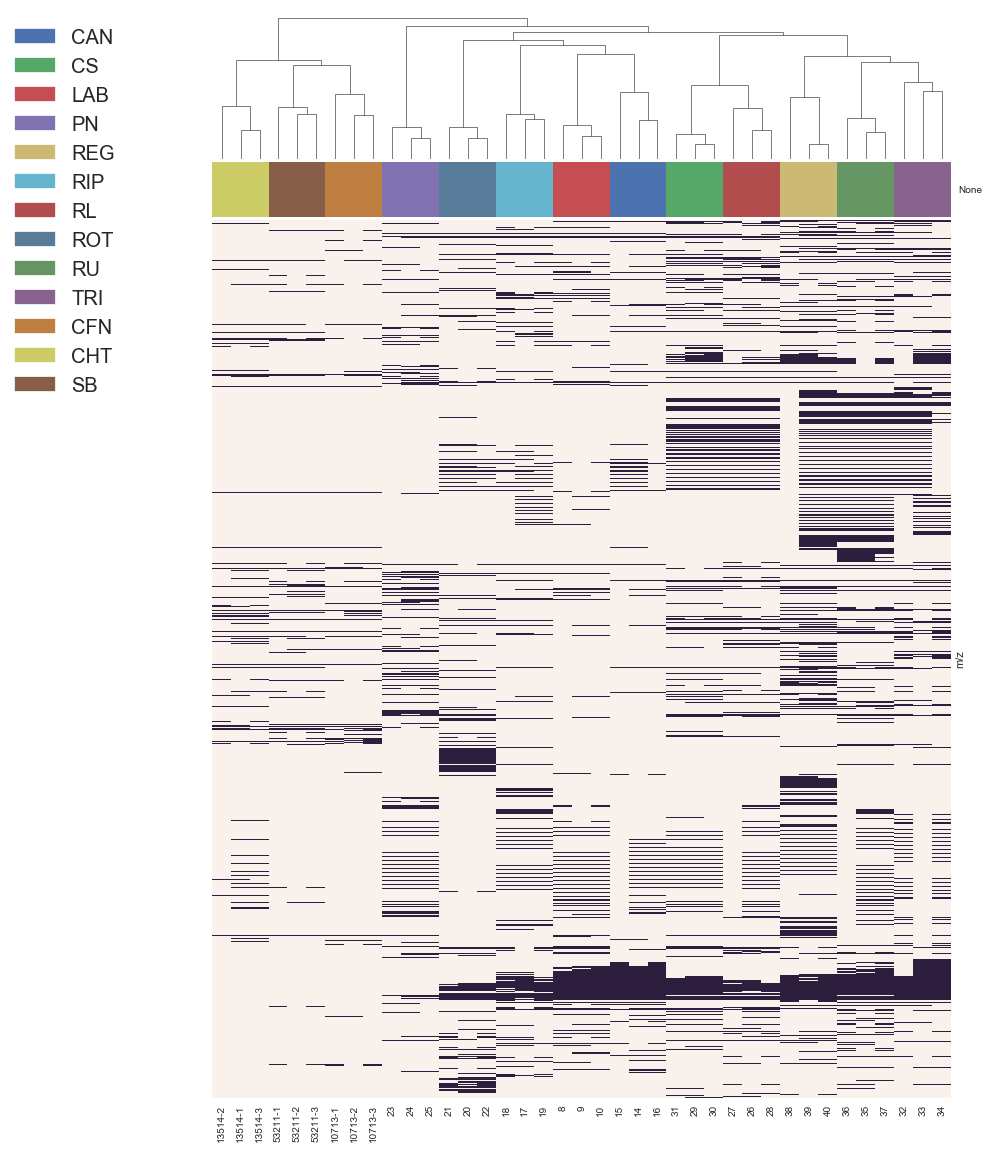

In [21]:
print('Sample HC, NEGATIVE mode')
g = clustermap_peak_list(aligned_all_neg)
g.savefig('sampleHC_negative.pdf')


Sample HC, POSITIVE mode


C:\Users\francisco\Anaconda3\lib\site-packages\seaborn\matrix.py:795: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  colors = colors.ix[data.columns]
C:\Users\francisco\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


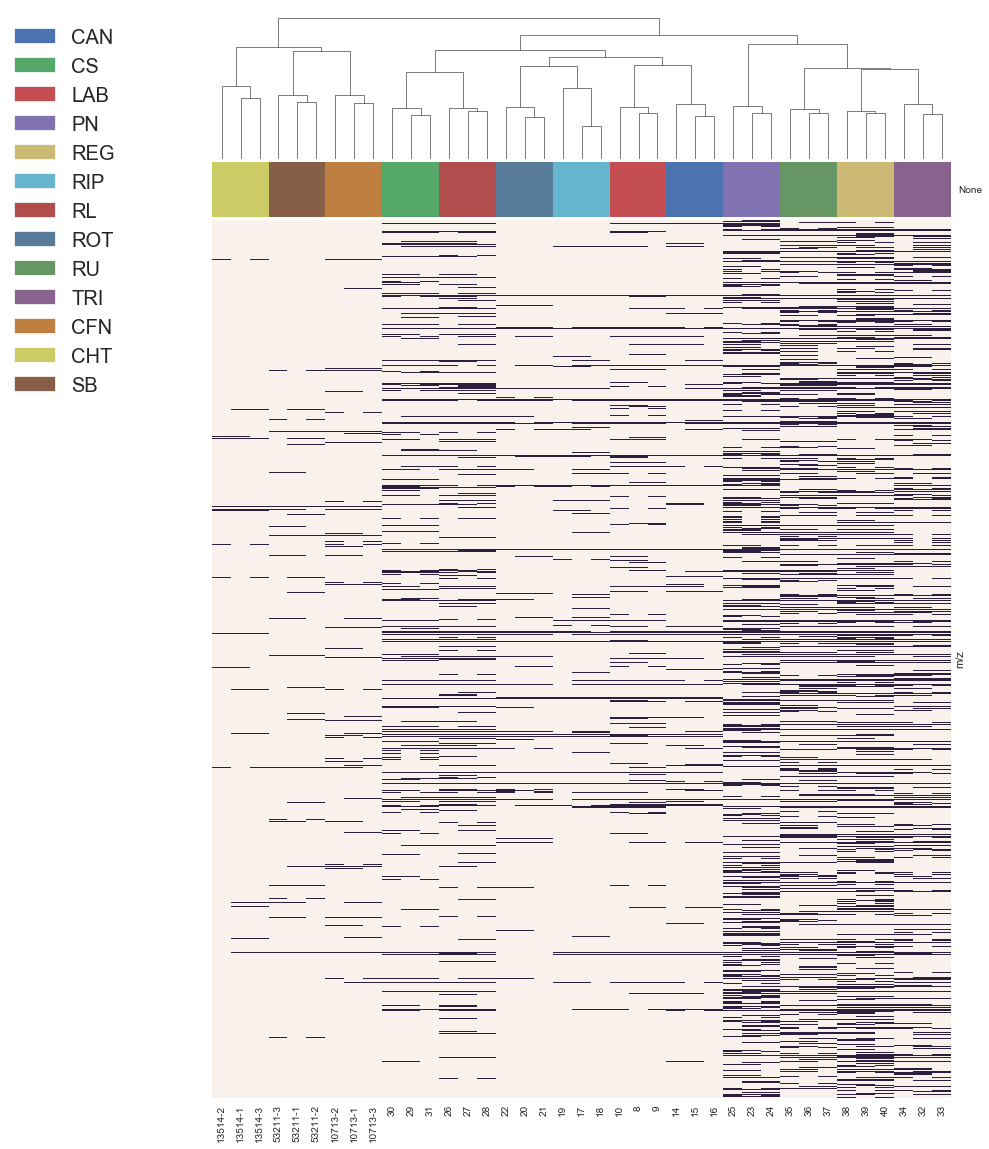

In [22]:
print('Sample HC, POSITIVE mode')
g = clustermap_peak_list(aligned_all_pos)
g.savefig('sampleHC_positive.pdf')

Cultivar dendogram, Jaccard distance, NEGATIVE MODE


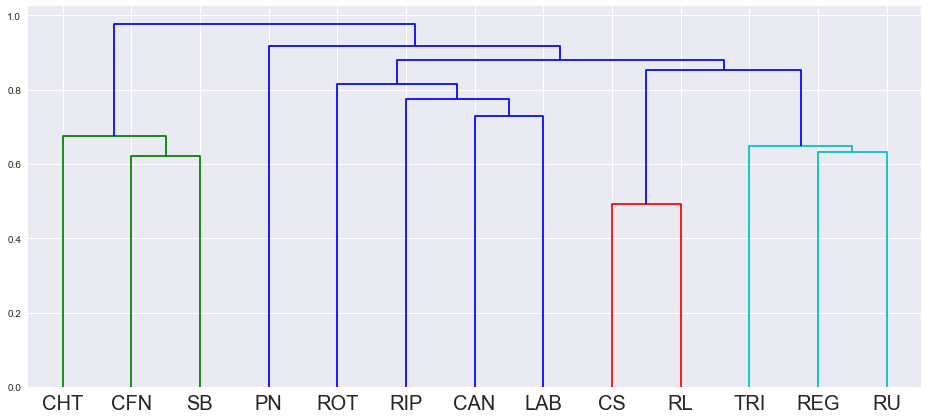

In [23]:
print('Cultivar dendogram, Jaccard distance, NEGATIVE MODE')
jdist = dist.squareform(1 - sim_neg.label_similarity_jaccard)
Z = hier.linkage(jdist, method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z, labels=sim_neg.unique_labels,
                     leaf_font_size=20,
                     above_threshold_color='b')
fig.savefig('dendo_cultivars_jaccard_negative.pdf')

In [24]:
print(hier.cophenet(Z,jdist)[0])

0.960206457887


Cultivar dendogram, Jaccard distance, POSITIVE MODE


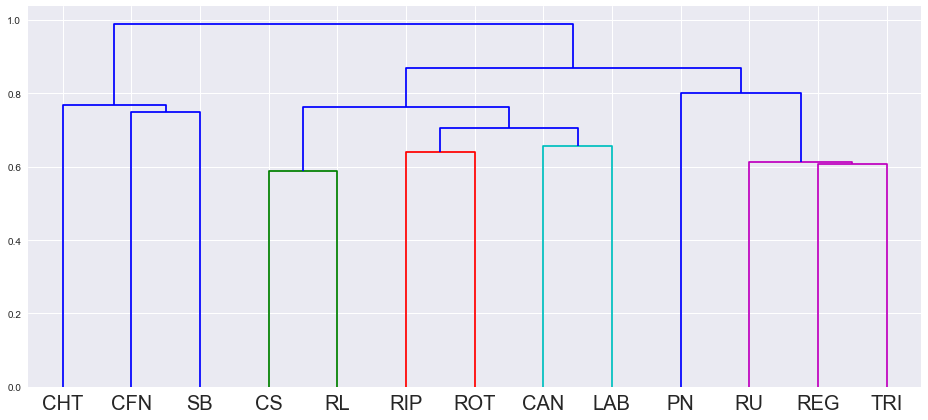

In [25]:
print('Cultivar dendogram, Jaccard distance, POSITIVE MODE')
jdist = dist.squareform(1 - sim_pos.label_similarity_jaccard)
Z = hier.linkage(jdist, method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z, labels=sim_pos.unique_labels,
                     leaf_font_size=20,
                     above_threshold_color='b')
fig.savefig('dendo_cultivars_jaccard_positive.pdf')

In [26]:
print(hier.cophenet(Z,jdist)[0])

0.968511807233


### Other Binary Similarity Analysis Methods

In [27]:
aligned_neg = df_to_bool(aligned_all_neg.data)
aligned_pos = df_to_bool(aligned_all_pos.data)

Cultivar dendogram, Binary methods, NEGATIVE MODE


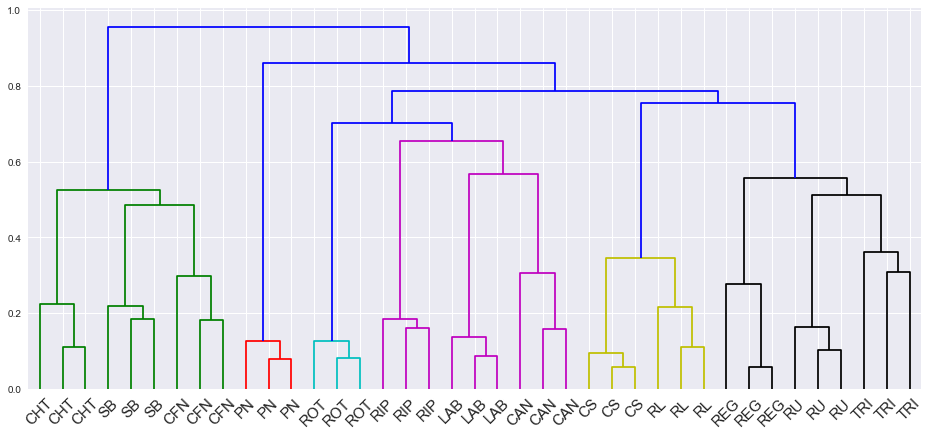

In [28]:
#Apply one of the following:
#dice, hamming, jaccard, rogerstanimoto, sokalmichener, sokalsneath, yule
#kulsinski, rusellrao

print('Cultivar dendogram, Binary methods, NEGATIVE MODE')
Zdice_neg = hier.linkage(aligned_neg.T, metric = 'dice', method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zdice_neg, labels=aligned_all_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

Cultivar dendogram, Binary methods, POSITIVE MODE


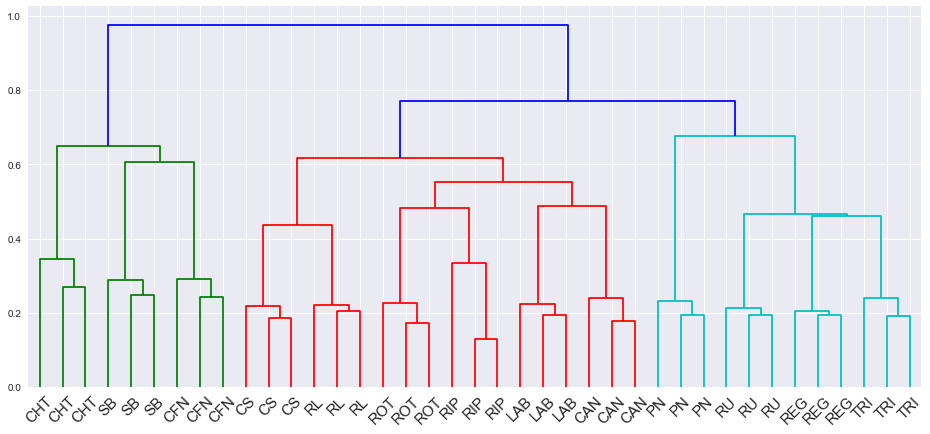

In [29]:
print('Cultivar dendogram, Binary methods, POSITIVE MODE')
Zdice_pos = hier.linkage(aligned_pos.T, metric = 'dice', method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zdice_pos, labels=aligned_all_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

### Non-binary Similarity Analysis

#### Missing Value Imputation and Scaling (Pareto Scaling), Euclidean Distances and Dendrogram Construction


In [30]:
import scaling as sca
import numpy as np

#### Negative Mode - Original peak alignment

3 types of processing:

Euc_neg - Missing Value Imputation and Pareto Scaling.

Euc_norm_neg - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_glog_neg - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling.

In [31]:
#Euc_neg
Imputated_neg = sca.NaN_Imputation(aligned_all_neg, 0)
Euc_neg = sca.ParetoScal(Imputated_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation and Pareto Scaling


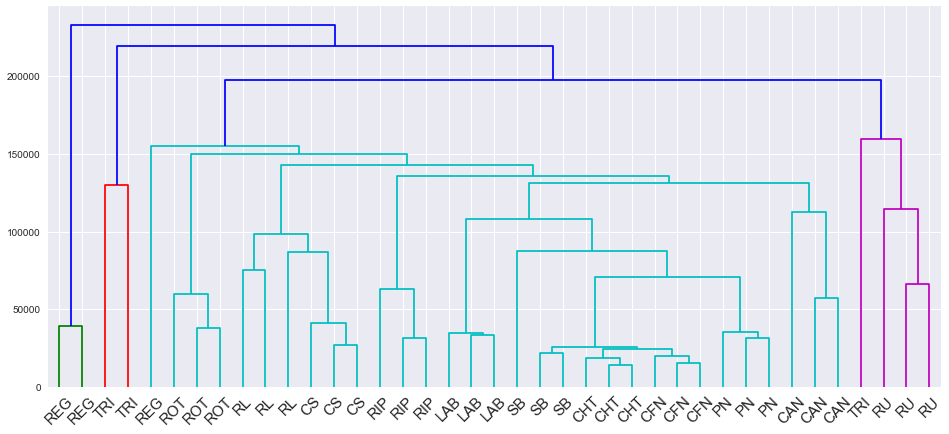

In [32]:
#Measure Euclidean distances
dist_euc_neg = dist.pdist(Euc_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation and Pareto Scaling')
Z_euc_neg = hier.linkage(dist_euc_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_neg, labels=Euc_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

In [33]:
#Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
print(hier.cophenet(Z_euc_neg,dist_euc_neg)[0]) #method average seems to lead to higher coefficients

0.939582707821


In [34]:
#Euc_norm_neg
#Theoretical mass for negative mode Leucine Enkephalin - 554.2615.
RefEst_Neg = sca.search_for_ref_feat(aligned_all_neg, 554.2615) #see if the function gives the reference feature
print(RefEst_Neg) #It did!

(554.26202000000001, 0.00052000000005136826)


In [35]:
Norm_neg = sca.Norm_Feat(Imputated_neg, 554.26202)
Euc_norm_neg = sca.ParetoScal(Norm_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized and Pareto Scaling


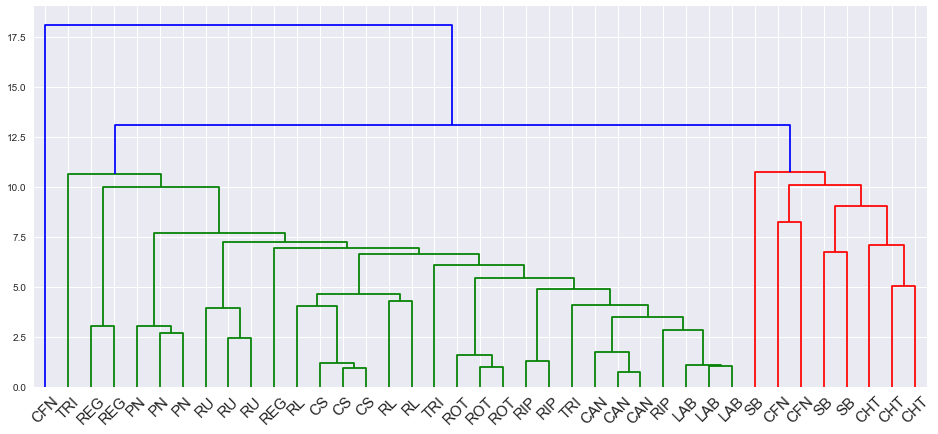

In [36]:
#Measure Euclidean distances
dist_euc_norm_neg = dist.pdist(Euc_norm_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_norm_neg = hier.linkage(dist_euc_norm_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_norm_neg, labels=Euc_norm_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

In [37]:
print(hier.cophenet(Z_euc_norm_neg,dist_euc_norm_neg)[0]) 

0.88662834485


In [38]:
#Euc_glog_neg
glog_neg = sca.glog(Norm_neg, 0)
Euc_glog_neg = sca.ParetoScal(glog_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling


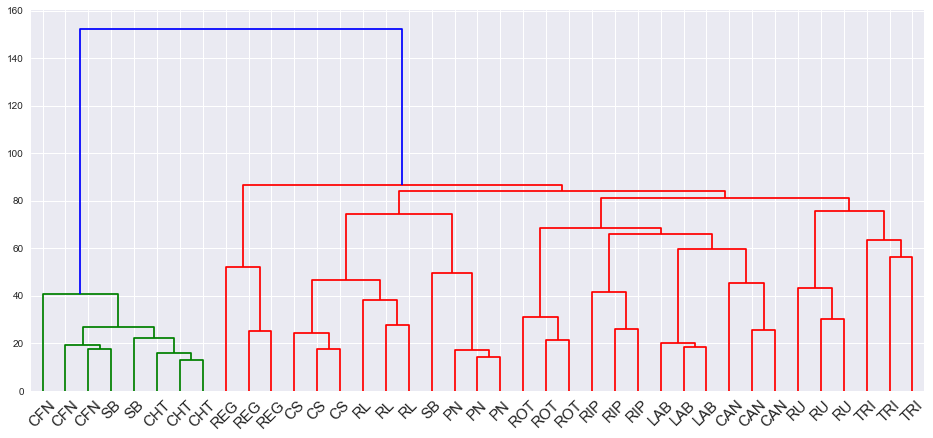

In [39]:
#Measure Euclidean distances
dist_euc_glog_neg = dist.pdist(Euc_glog_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_glog_neg = hier.linkage(dist_euc_glog_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_glog_neg, labels=Euc_glog_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

In [40]:
print(hier.cophenet(Z_euc_glog_neg,dist_euc_glog_neg)[0]) 

0.907201350578


Negative mode (features must be present in 2/3 sample) - doesn't work quite as well, original data already had features removed by other method)

In [41]:
Imputated2_neg = sca.NaN_Imputation(aligned_all_neg, 2/3)
Scaled2_neg = sca.ParetoScal(Imputated2_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE


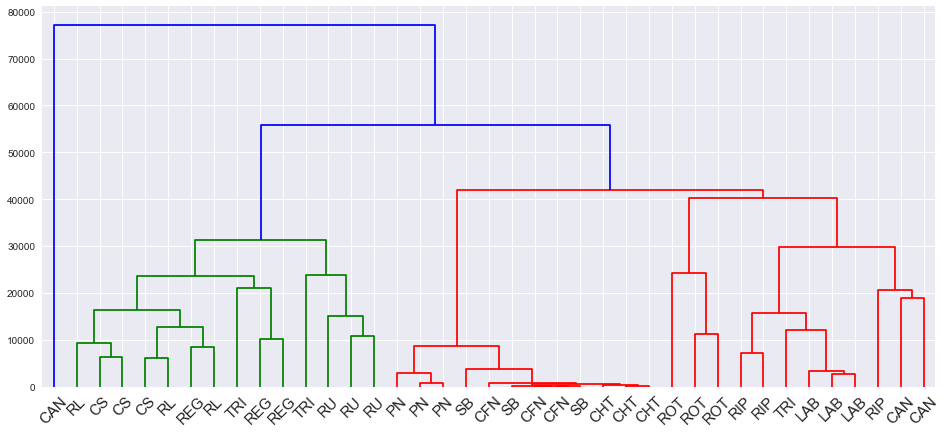

In [42]:
#Measure Euclidean distances
dist2_neg = dist.pdist(Scaled2_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE')
Zneg2 = hier.linkage(dist2_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zneg2, labels=Scaled2_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

In [43]:
print(hier.cophenet(Zneg2,dist2_neg)[0])

0.847298231278


#### Positive Mode - Original peak alignment

3 types of processing:

Euc_pos - Missing Value Imputation and Pareto Scaling.

Euc_norm_pos - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_glog_pos - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling.

In [44]:
#Euc_pos
Imputated_pos = sca.NaN_Imputation(aligned_all_pos, 0)
Euc_pos = sca.ParetoScal(Imputated_pos)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation and Pareto Scaling


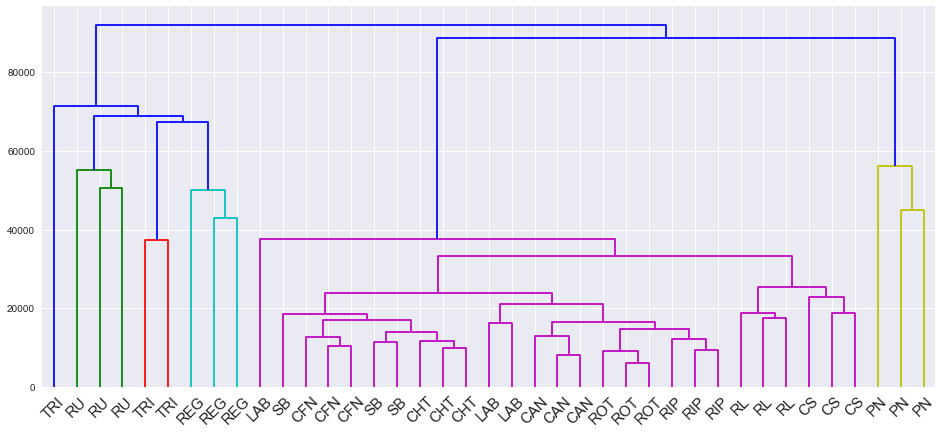

In [45]:
#Measure Euclidean distances
dist_euc_pos = dist.pdist(Euc_pos.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation and Pareto Scaling')
Z_euc_pos = hier.linkage(dist_euc_pos, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_pos, labels=Euc_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

In [46]:
print(hier.cophenet(Z_euc_pos,dist_euc_pos)[0])

0.980127182615


In [47]:
#Euc_norm_pos
#Theoretical mass for positive mode Leucine Enkephalin - 556.2771.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_pos, 556.2771)
print(RefEst_Pos)

(556.27657128205135, 0.0005287179486686)


In [48]:
Norm_pos = sca.Norm_Feat(Imputated_pos, 556.2765712820513)
Euc_norm_pos = sca.ParetoScal(Norm_pos)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized and Pareto Scaling


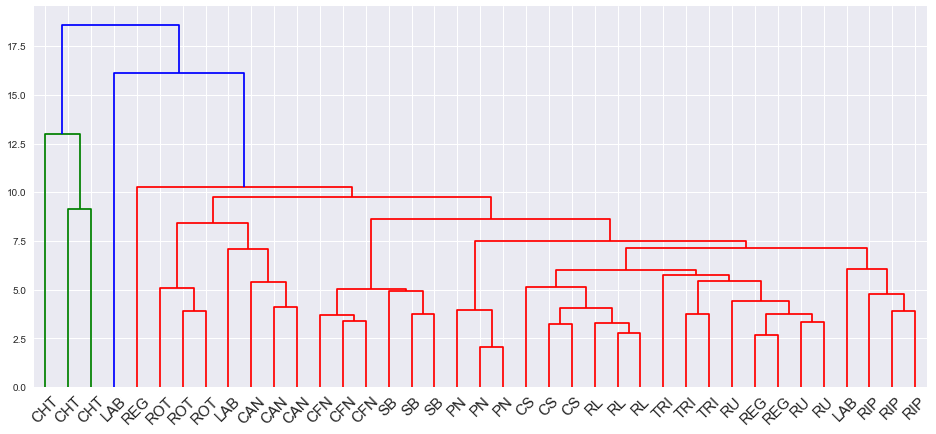

In [49]:
#Measure Euclidean distances
dist_euc_norm_pos = dist.pdist(Euc_norm_pos.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_norm_pos = hier.linkage(dist_euc_norm_pos, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_norm_pos, labels=Euc_norm_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

In [50]:
print(hier.cophenet(Z_euc_norm_pos,dist_euc_norm_pos)[0])

0.88345537695


In [51]:
#Euc_glog_pos
glog_pos = sca.glog(Norm_pos, 0)
Euc_glog_pos = sca.ParetoScal(glog_pos)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling


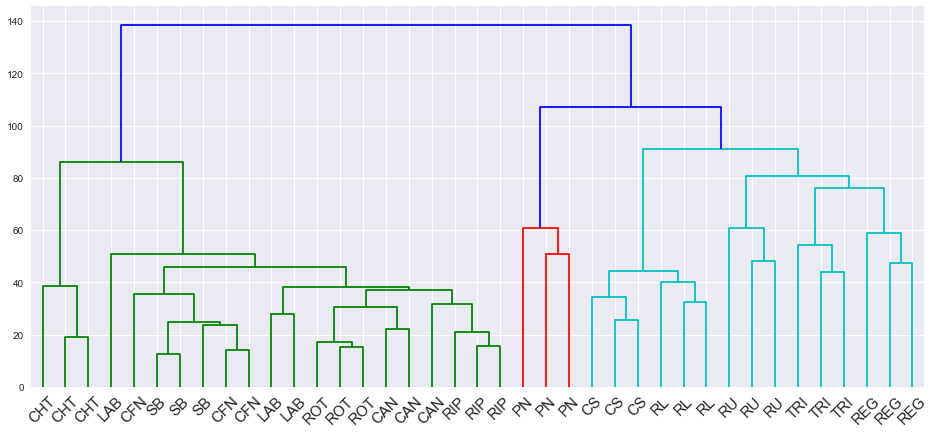

In [52]:
#Measure Euclidean distances
dist_euc_glog_pos = dist.pdist(Euc_glog_pos.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_glog_pos = hier.linkage(dist_euc_glog_pos, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_glog_pos, labels=Euc_glog_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

In [53]:
print(hier.cophenet(Z_euc_glog_pos,dist_euc_glog_pos)[0])

0.797572414681


#### Negative Mode - Peak alignment (requires a feature to be present in at least all samples of a variety)

Same procedure as before:

3 types of processing:

Euc_neg2 - Missing Value Imputation and Pareto Scaling.

Euc_norm_neg2 - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_glog_neg2 - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling.

In [54]:
aligned_all_pos2 = read_aligned_spectra('aligned_1ppm_min3-3_1ppm_positive.csv', labels=True, sep=',')
aligned_all_neg2 = read_aligned_spectra('aligned_1ppm_min3-3_1ppm_negative.csv', labels=True, sep=',')

In [55]:
#Euc_neg2
Imputated_neg2 = sca.NaN_Imputation(aligned_all_neg2, 0)
Euc_neg2 = sca.ParetoScal(Imputated_neg2)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Different peak alignment, NaN Imputation and Pareto Scaling


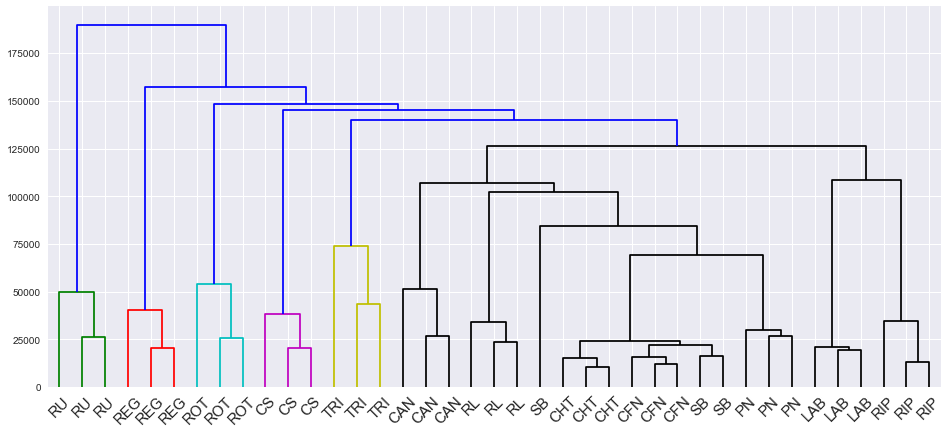

In [56]:
#Measure Euclidean distances
dist_euc_neg2 = dist.pdist(Euc_neg2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Different peak alignment, NaN Imputation and Pareto Scaling')
Z_euc_neg2 = hier.linkage(dist_euc_neg2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_neg2, labels=Euc_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

In [57]:
print(hier.cophenet(Z_euc_neg2,dist_euc_neg2)[0]) 

0.895871496369


In [58]:
#Euc_norm_neg2
#Theoretical mass for negative mode Leucine Enkephalin - 554.2615.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_neg2, 554.2615)
print(RefEst_Pos) #Same result as previous alignment.
Norm_neg2 = sca.Norm_Feat(Imputated_neg2, 554.26202)
Euc_norm_neg2 = sca.ParetoScal(Norm_neg2)

(554.26202000000001, 0.00052000000005136826)


Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Different peak alignment, NaN Imputation, Normalized and Pareto Scaling


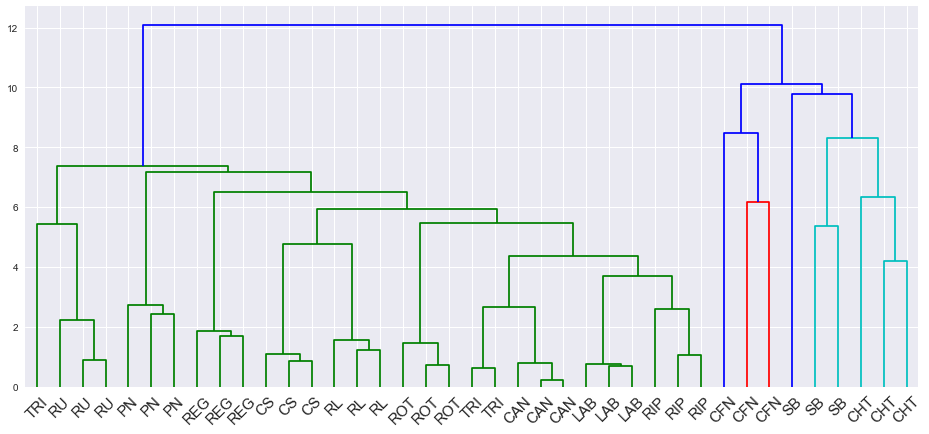

In [59]:
#Measure Euclidean distances
dist_euc_norm_neg2 = dist.pdist(Euc_norm_neg2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Different peak alignment, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_norm_neg2 = hier.linkage(dist_euc_norm_neg2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_norm_neg2, labels=Euc_norm_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

In [60]:
print(hier.cophenet(Z_euc_norm_neg2,dist_euc_norm_neg2)[0])

0.873670841344


In [61]:
#Euc_glog_neg2
glog_neg2 = sca.glog(Norm_neg2, 0)
Euc_glog_neg2 = sca.ParetoScal(glog_neg2)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Different peak alignment, NaN Imputation, Normalized, Transformed and Pareto Scaling


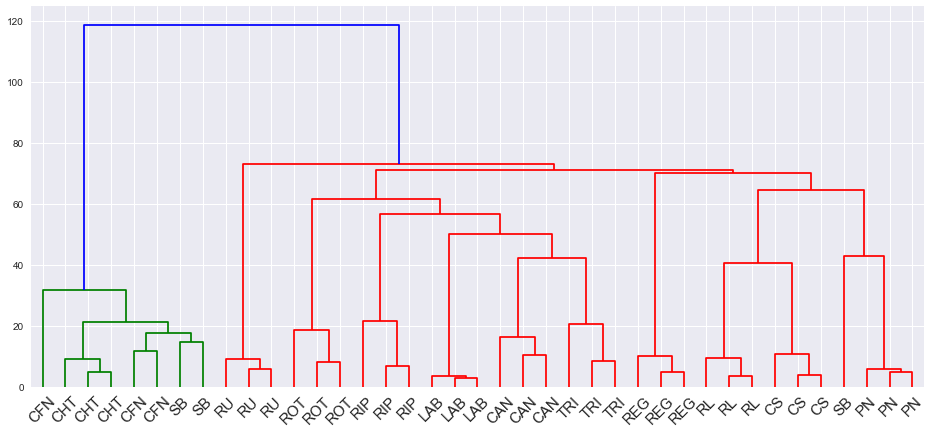

In [62]:
#Measure Euclidean distances
dist_euc_glog_neg2 = dist.pdist(Euc_glog_neg2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Different peak alignment, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_glog_neg2 = hier.linkage(dist_euc_glog_neg2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_glog_neg2, labels=Euc_glog_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

In [63]:
print(hier.cophenet(Z_euc_glog_neg2,dist_euc_glog_neg2)[0]) #method average seems to lead to higher coefficients

0.907055215231


#### Positive Mode - Peak alignment (requires a feature to be present in at least all samples of a variety)

Same procedure as before:

3 types of processing:

Euc_pos2 - Missing Value Imputation and Pareto Scaling.

Euc_norm_pos2 - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_glog_pos2 - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling

In [64]:
#Euc_pos2
Imputated_pos2 = sca.NaN_Imputation(aligned_all_pos2, 0)
Euc_pos2 = sca.ParetoScal(Imputated_pos2)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, Different peak alignment, NaN Imputation and Pareto Scaling


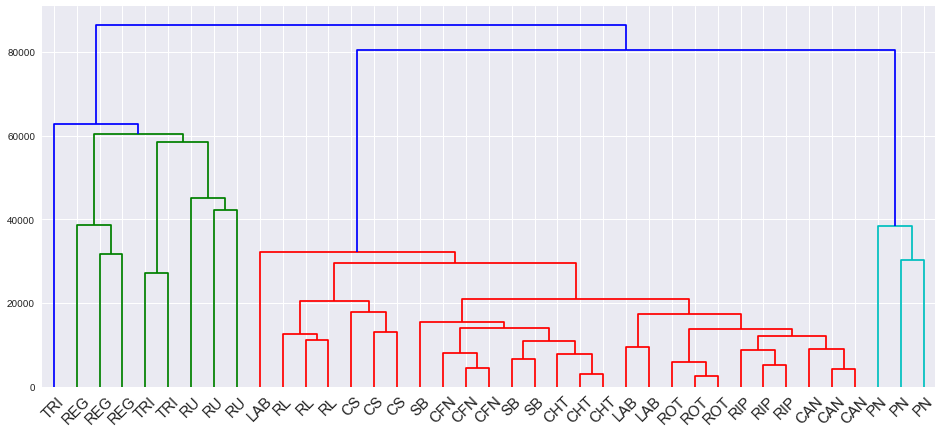

In [65]:
#Measure Euclidean distances
dist_euc_pos2 = dist.pdist(Euc_pos2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, Different peak alignment, NaN Imputation and Pareto Scaling')
Z_euc_pos2 = hier.linkage(dist_euc_pos2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_pos2, labels=Euc_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

In [66]:
print(hier.cophenet(Z_euc_pos2,dist_euc_pos2)[0])

0.977516185639


In [67]:
#Euc_norm_pos2
#Theoretical mass for positive mode Leucine Enkephalin - 556.2771.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_pos, 556.2771)
print(RefEst_Pos) #Same result as previous alignment.
Norm_pos2 = sca.Norm_Feat(Imputated_pos2, 556.2765712820513)
Euc_norm_pos2 = sca.ParetoScal(Norm_pos2)

(556.27657128205135, 0.0005287179486686)


Cultivar dendogram, Euclidean distance, POSITIVE MODE, Different peak alignment, NaN Imputation, Normalized and Pareto Scaling


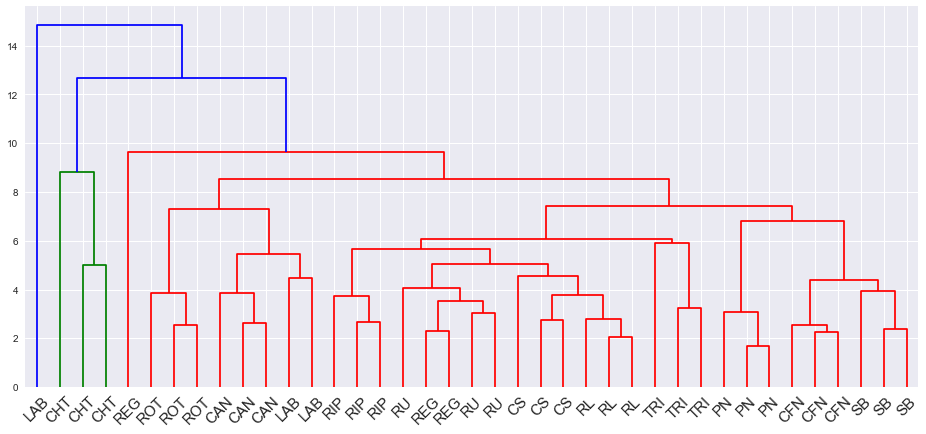

In [68]:
#Measure Euclidean distances
dist_euc_norm_pos2 = dist.pdist(Euc_norm_pos2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, Different peak alignment, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_norm_pos2 = hier.linkage(dist_euc_norm_pos2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_norm_pos2, labels=Euc_norm_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

In [69]:
print(hier.cophenet(Z_euc_norm_pos2,dist_euc_norm_pos2)[0])

0.854535789909


In [70]:
#Euc_glog_pos
glog_pos2 = sca.glog(Norm_pos2, 0)
Euc_glog_pos2 = sca.ParetoScal(glog_pos2)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, Different peak alignment, NaN Imputation, Normalized, Transformed and Pareto Scaling


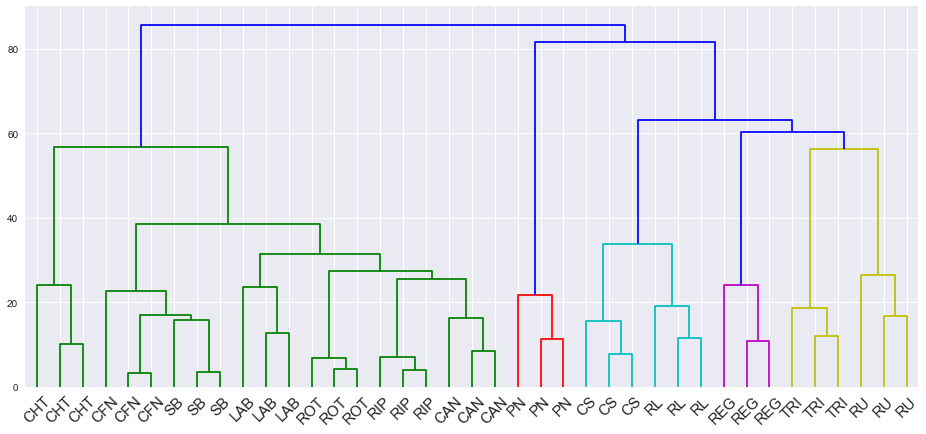

In [71]:
#Measure Euclidean distances
dist_euc_glog_pos2 = dist.pdist(Euc_glog_pos2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, Different peak alignment, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_glog_pos2 = hier.linkage(dist_euc_glog_pos2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_glog_pos2, labels=Euc_glog_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')

In [72]:
print(hier.cophenet(Z_euc_glog_pos2,dist_euc_glog_pos2)[0])

0.818887562981


### Comparing Dendrograms

#### Two methods so far: Baker's Gamma Correlation and Cophenetic Correlation Coefficient

#### Examples of procedure with these methods

In [73]:
import numpy as np
import scipy.stats as stats

#### Baker's method

In [74]:

def mergerank(Z):
    """Creates a 'rank' of the iteration number two samples were linked to the same cluster.
       
       Z: 2-D array; the return of the linkage function in scypy.stats.hierarchy.
       Returns: Matrix/2-D array; Symmetrical Square Matrix (dimensions: len(Z)+1 by len(Z)+1), (i,j) position is the iteration 
    number sample i and j were linked to the same cluster (higher rank means the pair took more iterations to be linked together).
    """
    
    kmatrix = np.zeros((len(Z)+1, len(Z)+1))
    clust = {}
    for i in range(0,len(Z)+1):
        clust[i] = (float(i),)
    for r in range(0,len(Z)):
        if Z[r,0] and Z[r,1] < len(Z)+1:
            kmatrix[int(Z[r,0]),int(Z[r,1])] = r+1
            kmatrix[int(Z[r,1]),int(Z[r,0])] = r+1
            clust[len(Z)+1+r] = Z[r,0],Z[r,1] #Dictionary with the elements in the cluster formed at iteration r. - r: (elements)
        else:
            clust[len(Z)+1+r] = clust[Z[r,0]] + clust[Z[r,1]] #Dictionary with the elements in the cluster formed at iteration r.
            for i in range(0,len(clust[Z[r,0]])):
                for j in range(0,len(clust[Z[r,1]])):
                    kmatrix[int(clust[Z[r,0]][i]),int(clust[Z[r,1]][j])] = r+1
                    kmatrix[int(clust[Z[r,1]][j]),int(clust[Z[r,0]][i])] = r+1
    return kmatrix


In [75]:
euclidean = (Z_euc_neg, Z_euc_norm_neg, Z_euc_glog_neg, Z_euc_pos, Z_euc_norm_pos, Z_euc_glog_pos,
            Z_euc_neg2, Z_euc_norm_neg2, Z_euc_glog_neg2, Z_euc_pos2, Z_euc_norm_pos2, Z_euc_glog_pos2)
dist_euclidean = (dist_euc_neg, dist_euc_norm_neg, dist_euc_glog_neg, dist_euc_pos, dist_euc_norm_pos, dist_euc_glog_pos,
                 dist_euc_neg2, dist_euc_norm_neg2, dist_euc_glog_neg2, dist_euc_pos2, dist_euc_norm_pos2, dist_euc_glog_pos2)

K_euc = []
S_euc = []
Coph_euc = []

for i in range(len(euclidean)):
    K_euc.append(mergerank(euclidean[i])) #Mergerank
    S_euc.append(K_euc[i][K_euc[i]!=0]) #Both reshape to a 1D array (needed for spearman correlation) and take out 0's 
    Coph_euc.append(hier.cophenet(euclidean[i], dist_euclidean[i])) #Matrix of Cophenetic distances

#### Examples

According to Original Paper (Stability of Two Hierarchical Grouping Techniques Case 1: Sensitivity to Data Errors)

In [76]:
print('Pair of samples      \tKendall Correlation \tp-value')
print('Euc_neg-Euc_norm_neg\t', stats.kendalltau(S_euc[0],S_euc[1])[0], '\t', stats.kendalltau(S_euc[0],S_euc[1])[1])
print('Euc_neg-Euc_glog_neg\t', stats.kendalltau(S_euc[0],S_euc[2])[0], '\t', stats.kendalltau(S_euc[0],S_euc[2])[1])

Pair of samples      	Kendall Correlation 	p-value
Euc_neg-Euc_norm_neg	 0.00891039911268 	 0.644385076123
Euc_neg-Euc_glog_neg	 0.10839742231 	 3.8352456453e-08


According to the explanation given in the R package dendextend

In [77]:
print('Pair of samples      \tSpearman Correlation \tp-value')
print('Euc_neg-Euc_norm_neg\t', stats.spearmanr(S_euc[0],S_euc[1])[0], '\t', stats.spearmanr(S_euc[0],S_euc[1])[1])
print('Euc_neg-Euc_glog_neg\t', stats.spearmanr(S_euc[0],S_euc[2])[0], '\t', stats.spearmanr(S_euc[0],S_euc[2])[1])

Pair of samples      	Spearman Correlation 	p-value
Euc_neg-Euc_norm_neg	 -0.015575487635 	 0.54908212548
Euc_neg-Euc_glog_neg	 0.129266793539 	 5.94130770267e-07


#### Cophenetic Correlation Coefficient

In [78]:
#Acho que se pode aplicar logo a função np.corrcoef visto os elementos que vêm da função cophenet estão sempre na mesma ordem 
#uns em relação aos outros.

In [79]:
print('Pair of samples      \tPearson Correlation \tp-value')
print('Euc_neg-Euc_norm_neg\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[1][1])[0], '\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[1][1])[1])
print('Euc_neg-Euc_glog_neg\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[2][1])[0], '\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[2][1])[1])

Pair of samples      	Pearson Correlation 	p-value
Euc_neg-Euc_norm_neg	 0.0188618315607 	 0.608215299876
Euc_neg-Euc_glog_neg	 0.160503074641 	 1.13235103793e-05


### Comparison of dendrograms made with all binary metrics and euclidean distances 

#### Correlations between all pairs using all 3 methods

In [80]:
#9 binary methods accepted in pdist (scipy.spatial.distances.pdist)
binary = ('dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 'yule', 'kulsinski', 'russellrao')

In [81]:
#Application of all "single" steps needed presented in the examples above with every distance metric.
#Negative mode
Z_neg = []
K_neg = []
S_neg = []
Coph_neg = []

for i in range(len(binary)):
    Z_neg.append(hier.linkage(aligned_neg.T, metric = binary[i], method='average')) #Z
    K_neg.append(mergerank(Z_neg[i])) #Mergerank
    S_neg.append(K_neg[i][K_neg[i]!=0]) #Eliminating 0's
    Coph_neg.append(hier.cophenet(Z_neg[i], dist.pdist(aligned_neg.T, metric = binary[i]))) #Cophenetic

In [82]:
#Positive Mode
Z_pos = []
K_pos = []
S_pos = []
Coph_pos = []

for i in range(len(binary)):
    Z_pos.append(hier.linkage(aligned_pos.T, metric = binary[i], method='average')) #Z
    K_pos.append(mergerank(Z_pos[i])) #Mergerank
    S_pos.append(K_pos[i][K_pos[i]!=0]) #Eliminating 0's
    Coph_pos.append(hier.cophenet(Z_pos[i], dist.pdist(aligned_pos.T, metric = binary[i]))) #Cophenetic

In [83]:
#Creation of a list with all the "rank" values (in order) for the different metrics: 
#Negative Euclideans, Positive Euclideans, Negative Binaries, Positive Binaries
S = []
S.extend(S_euc)
S.extend(S_neg)
S.extend(S_pos)
#Creation of a list with all the returns from the function cophenetic for the different metrics: 
#Negative Euclideans, Positive Euclideans, Negative Binaries, Positive Binaries
Coph = []
Coph.extend(Coph_euc)
Coph.extend(Coph_neg)
Coph.extend(Coph_pos)

Creation of all dataframes needed to store all correlation coeficients and respective p-values fot all three methods

In [84]:
#Column names and row names for the dataframes
colnames = ['euc_neg', 'euc_norm_neg', 'euc_glog_neg', 'euc_pos', 'euc_norm_pos', 'euc_glog_pos','euc_neg2', 'euc_norm_neg2', 
            'euc_glog_neg2', 'euc_pos2', 'euc_norm_pos2', 'euc_glog_pos2','dice_neg', 'hamming_neg', 'jaccard_neg', 
            'rogerstanimoto_neg', 'sokalmichener_neg', 'sokalsneath_neg','yule_neg', 'kulsinski_neg', 'russellrao_neg',
            'dice_pos', 'hamming_pos', 'jaccard_pos', 'rogerstanimoto_pos', 'sokalmichener_pos', 'sokalsneath_pos', 
            'yule_pos', 'kulsinski_pos', 'russellrao_pos']

In [85]:
df_K = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #K - Kendall (Baker)
df_S = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #S - Spearman (Baker)
df_C = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #C - Cophenetic Correlation
df_K_p = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #p-values of K method
df_S_p = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #p-values of S method
df_C_p = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #p-values of C method

In [86]:
#Calculation of correlation coefficient for each method
for i in range(len(S)):
    for j in range(len(S)):
        df_K.iloc[i,j] = stats.kendalltau(S[i],S[j])[0] #Correlation coefficient
        df_S.iloc[i,j] = stats.spearmanr(S[i],S[j])[0] #Correlation coefficient
        df_C.iloc[i,j] = stats.pearsonr(Coph[i][1],Coph[j][1])[0] #Correlation coefficient
        df_K_p.iloc[i,j] = stats.kendalltau(S[i],S[j])[1] #p-value
        df_S_p.iloc[i,j] = stats.spearmanr(S[i],S[j])[1] #p-value
        df_C_p.iloc[i,j] = stats.pearsonr(Coph[i][1],Coph[j][1])[1] #p-value

### Heatmaps of the correlation coeficients for the 3 methods

Baker (Kendall) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
DistanceMetric_Mode
Euc - Original peak alignment that all binary measures use
Euc2 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


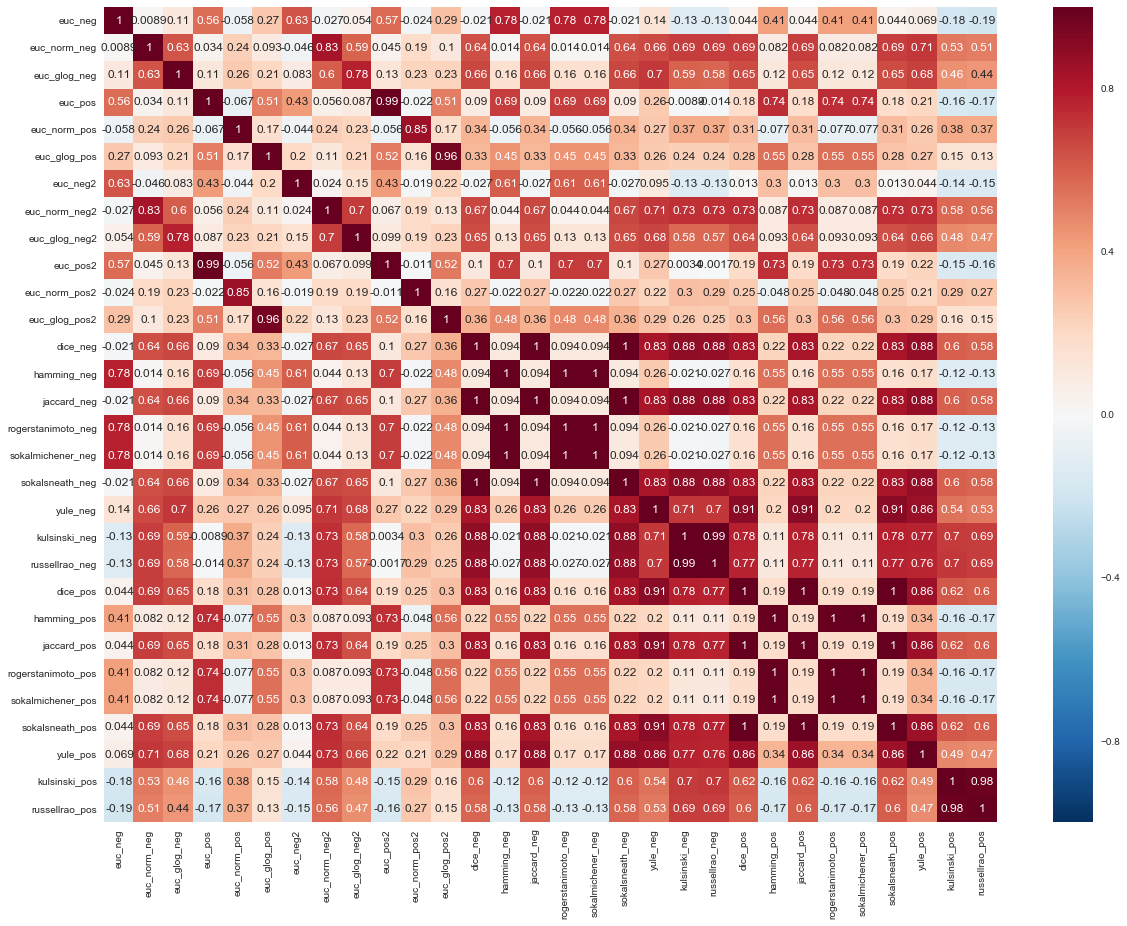

In [87]:
f, ax = plt.subplots(figsize=(20, 15))

print('Baker (Kendall) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('DistanceMetric_Mode')
print('Euc - Original peak alignment that all binary measures use')
print('Euc2 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
hm = sns.heatmap(df_K, annot=True, ax=ax)

Baker (Spearman) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
DistanceMetric_Mode
Euc - Original peak alignment that all binary measures use
Euc2 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


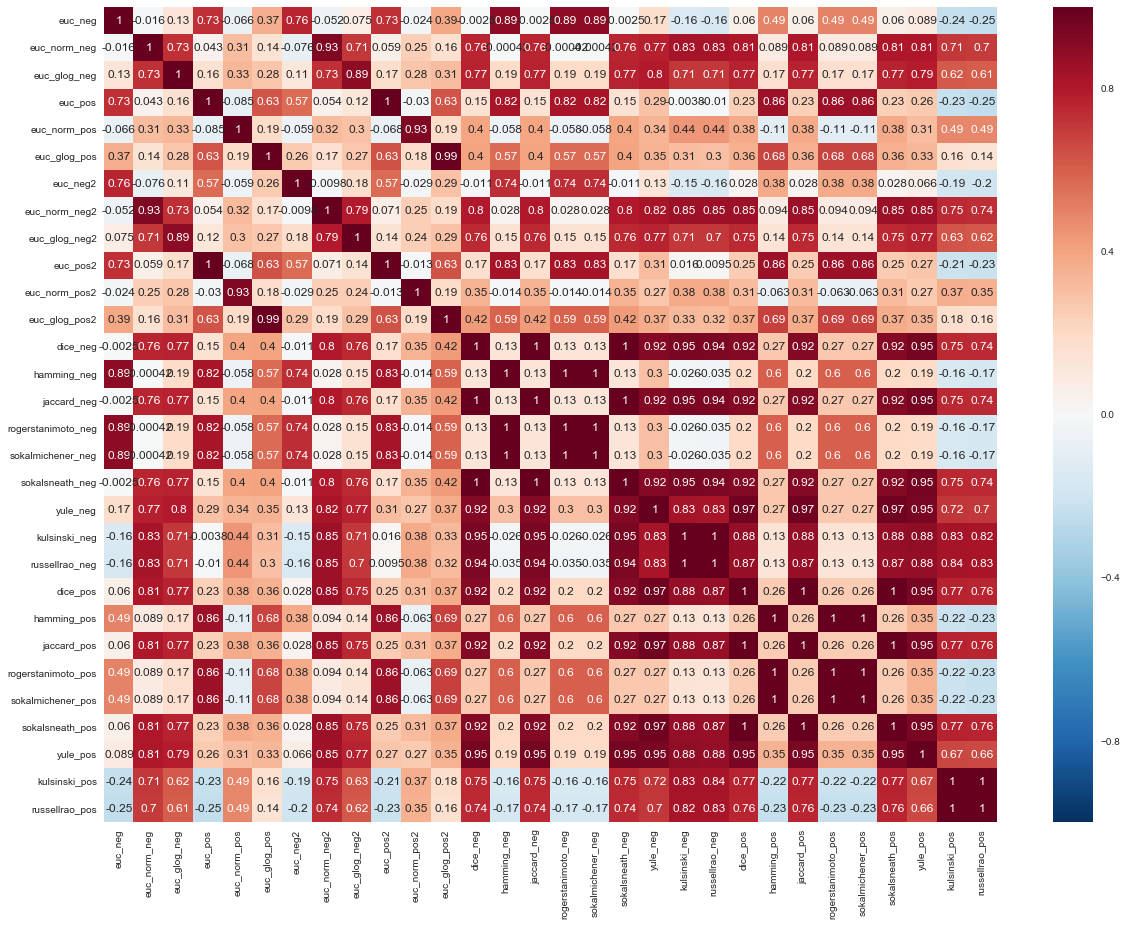

In [88]:
f, ax = plt.subplots(figsize=(20, 15))

print('Baker (Spearman) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('DistanceMetric_Mode')
print('Euc - Original peak alignment that all binary measures use')
print('Euc2 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
hm = sns.heatmap(df_S, annot=True, ax=ax)

Cophenetic Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
DistanceMetric_Mode
Euc - Original peak alignment that all binary measures use
Euc2 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


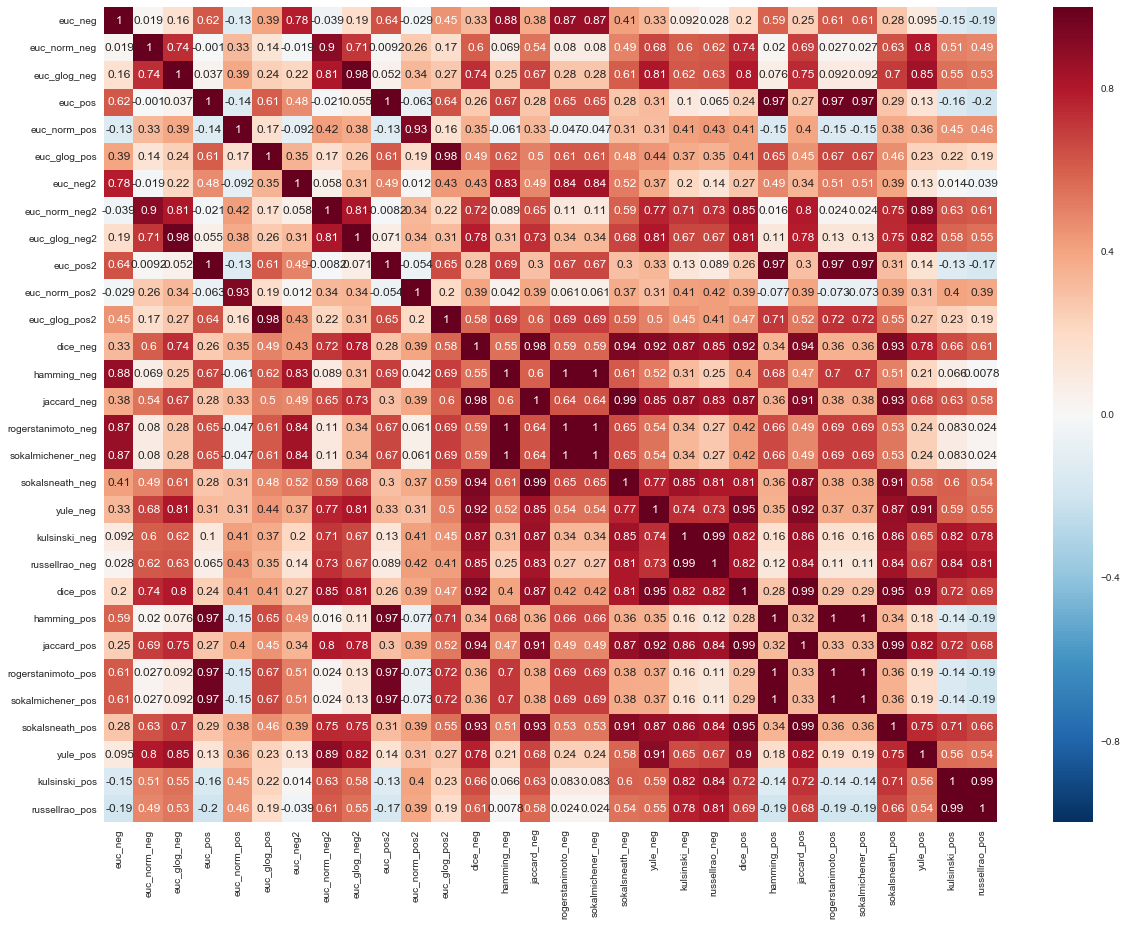

In [89]:
f, ax = plt.subplots(figsize=(20, 15))

print('Cophenetic Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('DistanceMetric_Mode')
print('Euc - Original peak alignment that all binary measures use')
print('Euc2 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
hm = sns.heatmap(df_C, annot=True, ax=ax)

### Hierarchical clustering of the correlation coeficients of dendrograms made with different distance metrics with each other

Some functions that might be useful in the future

Hierarchical clustering of the Baker (Kendall) Correlation Coefficients of the dendrograms made with different distance metrics
Label: DistanceMetric_Mode
Euc - Original peak alignment that all binary measures use
Euc2 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


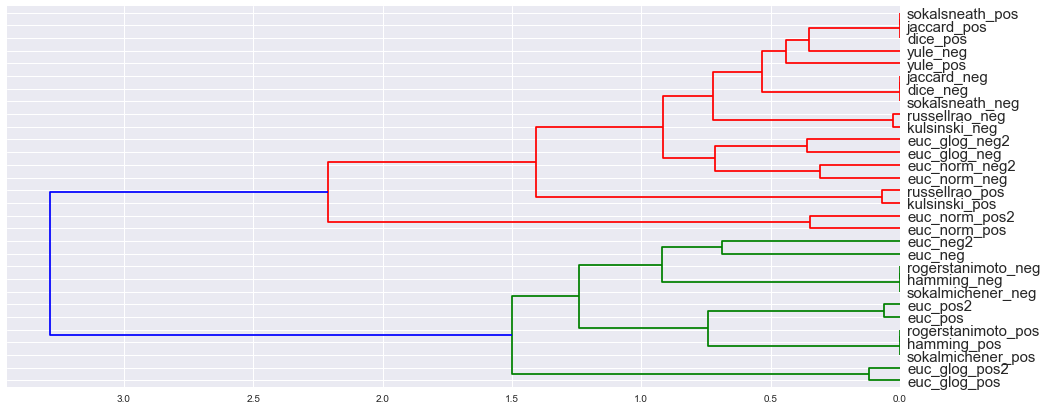

In [90]:
print('Hierarchical clustering of the Baker (Kendall) Correlation Coefficients of the dendrograms made with different distance metrics')
print('Label: DistanceMetric_Mode')
print('Euc - Original peak alignment that all binary measures use')
print('Euc2 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
Z_K = hier.linkage(df_K, metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_K, labels=df_K.columns,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')

Hierarchical clustering of the Baker (Spearman) Correlation Coefficients of the dendrograms made with different distance metrics
Label: DistanceMetric_Mode
Euc - Original peak alignment that all binary measures use
Euc2 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


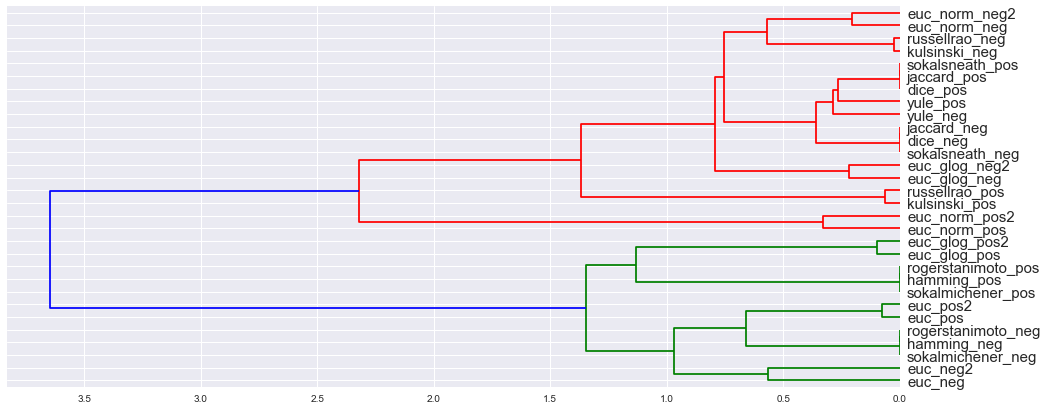

In [91]:
print('Hierarchical clustering of the Baker (Spearman) Correlation Coefficients of the dendrograms made with different distance metrics')
print('Label: DistanceMetric_Mode')
print('Euc - Original peak alignment that all binary measures use')
print('Euc2 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
Z_S = hier.linkage(df_S, metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_S, labels=df_S.columns,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')

Hierarchical clustering of the Cophenetic Correlation Coefficients of the dendrograms made with different distance metrics
Label: DistanceMetric_Mode
Euc - Original peak alignment that all binary measures use
Euc2 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


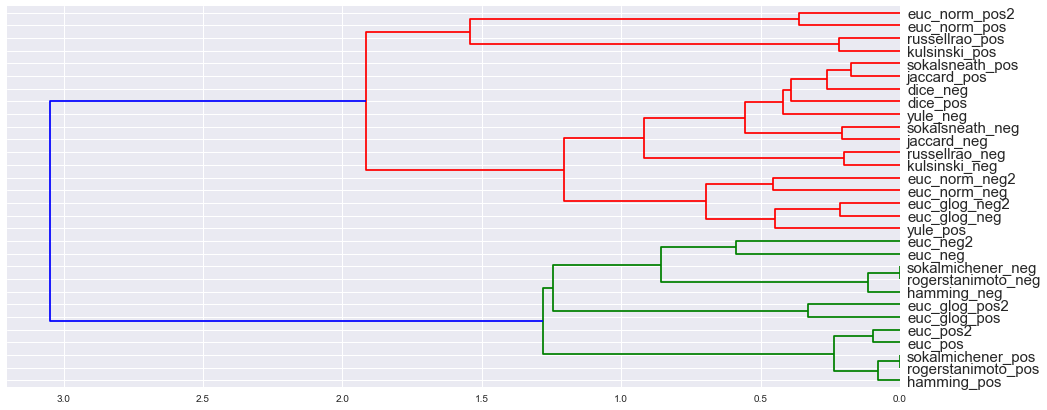

In [92]:
print('Hierarchical clustering of the Cophenetic Correlation Coefficients of the dendrograms made with different distance metrics')
print('Label: DistanceMetric_Mode')
print('Euc - Original peak alignment that all binary measures use')
print('Euc2 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
Z_C = hier.linkage(df_C, metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_C, labels=df_C.columns,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')

### Results summary of dendrograms made with the heatmaps

- Results similar for all 3 methods of calculating the correlation between different hierarchical clusterings.
- 2 big clusters formed based on the similarity of the correlations between different hierarchical clusterings (made with different distance metrics.
- One cluster with the binary measures: hamming, sokalmichener and rogerstanimoto; the other with: dice, jaccard, sokalsneath, yule, russellrao, kulsinski (this last two seem farther away than the rest).
- There is some difference between negative and positive datasets, however this difference isn't too big.
- Note that almost all of the correlation coefficients between groups are positive so most of them tend to show the same "major" trends in the data. However, after Pareto Scaling correction, the correlation values seem lower and there is a greater number of negative correlations (even if really small).

##### Comparison with Euclidean Distances
- Pareto Scaled data makes sample proximity based on euclidean distances closer to hamming, sokalmichener and rogerstanimoto binary distances.
- Normalized by reference features before Pareto Scaling data makes sample proximity based on euclidean distances be closer to all other binary measures: dice, jaccard, sokalsneath, yule, (russellrao, kulsinski). The positive dataset is still considerably separated even from its closest binary measures. Normalization also seems to prevent early separation of varieties with low number of peaks (samples CHT, SB and CFN). 
- glog transformation (currently only log transformation*2 - lacks glog optimization algorithm - to do (adding)) after normalization (and before Pareto Scaling) on the data seems becomes closer to the original Pareto Scaled data in the dendrograms for the positive dataset while it stays in the same cluster (as the normalized negative dataset) for the negative dataset. Also lambda seems to have a very small effect on the results (see MetAnalyst_Example.ipynb as an example).
- glog transformation without normalization data's results are very close to the glog transformation after normalization that were mentioned before and, as such, they aren't shown in the dendrogram to facilitate analysis.
- (One difference that can be one of the major reasons behind this 2 cluster groups and euclidean metrics shifting based on the data procesing may be the following: if the first "cluster separation" in each dendrogram starts with separating the varieties CHT, SB and CFN or not (and normally separating TRI, REG, RU) from the rest of the group.)
- Overall, the results seem difficult to interpret about which binary measure is closer to the results given using the conventional Euclidean Distances since the latter's result depend on the data processing that is made.
- Euclidean distances also don't allow to separate the different varieties individually very effectively and only separate them in "cluster of varieties" that are closer to eachother.

##### Comparison between the different peak alignments made and analysed with Euclidean Distances
- The two peak alignments seem to produce very similar results.
- The groups of the two peak alignments that suffer the same kind of data processing often "cluster" with each other (are closer to each other) than any other group in all 3 correlation metrics.
- Other peak alignments may change the previous results slightly but never too much (to alter the conclusions had). Example: requiring features to appear in 1/3 (13) of the samples: negative dataset without transformation is distant (close to euc_norm_pos as seen above) but the rest of results have the same conclusions - the positive dataset with this peak alignment is really close to the first positive dataset used here. 

##### Checking if the data processing gives similar results to the one made in MetaboAnalyst
- Check Jupyter Notebook MetAnalyst_Example.ipynb.

##### Checking if the data processing gives similar results without CHT, SB and CFN varieties
- Correlation values in general higher without those varieties.
- Dendrogram of individual distance metrics seem to be able to separate varieties better (not in all cases though).
- Hierarchical clustering of the correlation coeficients of dendrograms need more analysis however it seems like euclidean distances seem to be in general closer to hamming, sokalmichener, rogerstanimoto and yule binary measures than others (specially in the cophenetic correlation coefficients). The normalized positive dataset is really distant from other euclidean distances and most binary distances apart from kulsinki and russellrao that tend to have slightly negative correlations with other distances.
- I don't know where and if I should put these results.

##### (What I have) To do:
- Add way to calculate an optimal lambda for glog transformation.

#### Some functions that might be useful in the future

In [93]:
def reord_samples(DisorderedSpectra, OrderedSpectra):
    """Make a spectra have the same sample order than another.
    
       DisorderedSpectra, OrderedSpectra: AlignedSpectra objects (from metabolinks).
       
       Returns: AlignedSpectra object (from metabolinks); DisorderedSpectra ordered by the samples of Ordered Spectra.
       """
    ordered = DisorderedSpectra.data[OrderedSpectra.sample_names] 
    Reordered = AlignedSpectra(ordered, sample_names=OrderedSpectra.sample_names, labels=OrderedSpectra.sample_names.labels)
    return Reordered

In [94]:
#Needs - scipy.cluster.hierarchy as hier 
def Coph_Trans(Z, zdist):
    """Transforms the cophenet distances given by the function scypy.hierarchy.cophenet into a triangular matrix.
    
       Z: 2-D array; the return of the linkage function in scypy.stats.hierarchy.
       zdist: ndarray; the return of the distance function in scypy.spatial.distance.
       
       Returns: cophenetic correlation distance and a cophenetic distance matrix.
    """
    
    #Z2 = scipy.cluster.hierarchy.cophenet(Z, zdist)
    Z2 = hier.cophenet(Z, zdist)
    CCM = np.zeros((len(Z)+1, len(Z)+1))
    n = 0
    for i in range(0,len(Z)):
        j = i + 1
        while j < len(Z)+1:
            CCM[j,i] = Z2[1][n]
            j = j + 1
            n = n + 1
    return Z2[0], CCM

In [95]:
#Needs - scipy.cluster.hierarchy as hier and scipy.stats as stats
def Dendrogram_Sim(Z, zdist, Y, ydist, type = 'cophenetic', Trace = False):
    """Calculates a correlation coefficient between 2 dendograms based on their distances and hierarchical clustering performed.
    
       Z: 2-D array; hierarchical clustering encoded as a linkage matrix 1.
       zdist: ndarray; return of the distance function in scypy.spatial.distance for hierarchical clustering 1.
       Y: 2-D array; hierarchical clustering encoded as a linkage matrix 2.
       ydist: ndarray; return of the distance function in scypy.spatial.distance for hierarchical clustering 2.
       simtype: string, optional; types of correlation coefficient metrics to use; accepted: {'Baker Kendall', 'Baker Spearman',
    'cophenetic'}.
       Trace: bool, optional; gives a report of the correlation coefficient.
       
       Returns: (float, float); correlation coefficient of specified type and respective p-value.
    """    

    if type == 'cophenetic':
        CophZ = hier.cophenet(Z, zdist)
        CophY = hier.cophenet(Y, ydist)
        Corr = stats.pearsonr(CophZ[1],CophY[1])
        if Trace:
            print ('The Cophenetic Correlation Coefficient is:', Corr[ 0], ', and has a p-value of', Corr[1])
        return Corr
    else:
        KZ = mergerank (Z)
        KY = mergerank (Y)
        SZ = KZ[KZ!=0]
        SY = KY[KY!=0]
        if type == 'Baker Kendall': 
            Corr = stats.kendalltau(SZ,SY)
            if Trace:
                print ('The Baker (Kendall) Correlation Coefficient is:', Corr[0], ', and has a p-value of', Corr[1])
            return Corr
        elif type =='Baker Spearman':
            Corr = stats.spearmanr(SZ,SY)
            if Trace:
                print ('The Baker (Spearman) Correlation Coefficient is:', Corr[0], ', and has a p-value of', Corr[1])
            return Corr
        else:
            return print('Error: Type not Recognized')

In [96]:
def Dendrogram_prep(Spectra, minsample = 0, metric = 'euclidean', method = 'average'):
    """Hierarchical clustering of a spectra (feature removal, missing value imputation, Pareto scaling and linkage algorithm).
    
       Spectra: AlignedSpectra object (from metabolinks).
       minsample: scalar, optional; number between 0 and 1, minsample*100 is the minimum % of samples where the feature must
    be present in order to not be removed.
       metric: string, optional; type of distance metrics to use (distances betweens samples). Distance metrics: {'euclidean', 
    'dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 'yule', 'kulsinski', 'russellrao'}.
       method: string, optional; type of linkage algorithm to use. Types of methods: {'ward', 'average', 'centroid', 'single',
    'complete', 'weighted', 'median'}.
       
       Returns: (ndarray, ndarray); hierarchical clustering encoded as a linkage matrix, respective condensed distance matrix.
    """
    
    binary = ('dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 'yule', 'kulsinski', 'russellrao')
    if metric in binary:
        Bool = df_to_bool(Spectra.data)
        Dist = dist.pdist(Bool.T, metric = metric)
    else:
        Imputated = sca.NaN_Imputation(Spectra, minsample)
        Scaled = sca.ParetoScal(Imputated)
        Dist = dist.pdist(Scaled.data.T, metric = metric)
    
    Z = hier.linkage(Dist, method = method)
    Data = (Z, Dist)
    return Data